In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.6 kB/s eta 0:00:00
  Using cached te

In [2]:
BATCH_SIZE = 32
IMAGE_SIZEx = 256
IMAGE_SIZEy=256
CHANNELS=3
EPOCHS=50

In [5]:
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"/projects/crop disease detection/server/datsets/archive (1)/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZEx,IMAGE_SIZEy),
    batch_size=BATCH_SIZE
)

Found 1264 files belonging to 4 classes.


In [6]:
class_names = dataset.class_names
class_names

['miner', 'nodisease', 'phoma', 'rust']

In [7]:
len(dataset)

40

In [8]:
train_size = 0.8
len(dataset)*train_size

32.0

In [9]:
test_ds = dataset.skip(13)
len(test_ds)

27

In [10]:
val_size=0.1
len(dataset)*val_size

4.0

In [11]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [12]:
test_ds = test_ds.skip(1)
len(test_ds)

26

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

32

In [16]:
len(val_ds)

4

In [17]:
len(test_ds)

4

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
from tensorflow.keras import models, layers

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZEx, IMAGE_SIZEy),
  layers.Rescaling(1./255),
])


In [22]:
from tensorflow.keras import models, layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers

CHANNELS = 3
BATCH_SIZE = 32
IMAGE_SIZEx = 256
IMAGE_SIZEy=256 # Set your image height

input_shape = (IMAGE_SIZEx, IMAGE_SIZEy, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,  # Image resizing and rescaling
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  # First Conv2D with input_shape
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 899ms/step - accuracy: 0.3154 - loss: 1.3808 - val_accuracy: 0.4453 - val_loss: 1.3594
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 872ms/step - accuracy: 0.3814 - loss: 1.3036 - val_accuracy: 0.4219 - val_loss: 1.1804
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 815ms/step - accuracy: 0.4694 - loss: 1.1159 - val_accuracy: 0.5625 - val_loss: 0.9700
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 819ms/step - accuracy: 0.5402 - loss: 0.9838 - val_accuracy: 0.5156 - val_loss: 0.9603
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 813ms/step - accuracy: 0.5961 - loss: 0.8839 - val_accuracy: 0.5391 - val_loss: 0.9864
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 810ms/step - accuracy: 0.6144 - loss: 0.8942 - val_accuracy: 0.6797 - val_loss: 0.8102
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 816ms/step - accuracy: 0.7159 - loss: 0.7118 - val_accuracy: 0.6797 - val_loss: 0.7323
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 828ms/step - accuracy: 0.7370 - loss: 0.6454 - val_accu

In [34]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 1.0000 - loss: 0.0040


In [35]:
scores

[0.0031990420538932085, 1.0]

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 32}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
type(history.history['loss'])

list

In [39]:
len(history.history['accuracy'])

50

In [40]:
history.history['val_accuracy']

[0.4453125,
 0.421875,
 0.5625,
 0.515625,
 0.5390625,
 0.6796875,
 0.6796875,
 0.6484375,
 0.84375,
 0.890625,
 0.921875,
 0.8984375,
 0.890625,
 0.875,
 0.828125,
 0.9609375,
 0.9296875,
 0.9765625,
 0.9609375,
 0.8828125,
 0.90625,
 1.0,
 0.9765625,
 1.0,
 0.9921875,
 0.9921875,
 1.0,
 1.0,
 1.0,
 0.921875,
 0.96875,
 0.9921875,
 0.984375,
 0.9921875,
 0.921875,
 0.96875,
 1.0,
 0.984375,
 0.9921875,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9609375,
 0.953125,
 0.9140625,
 0.984375,
 1.0,
 0.9921875,
 0.984375]

In [41]:
history.history['loss'][:5]

[1.3754984140396118,
 1.2514351606369019,
 1.081902027130127,
 0.9879095554351807,
 0.9217879772186279]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

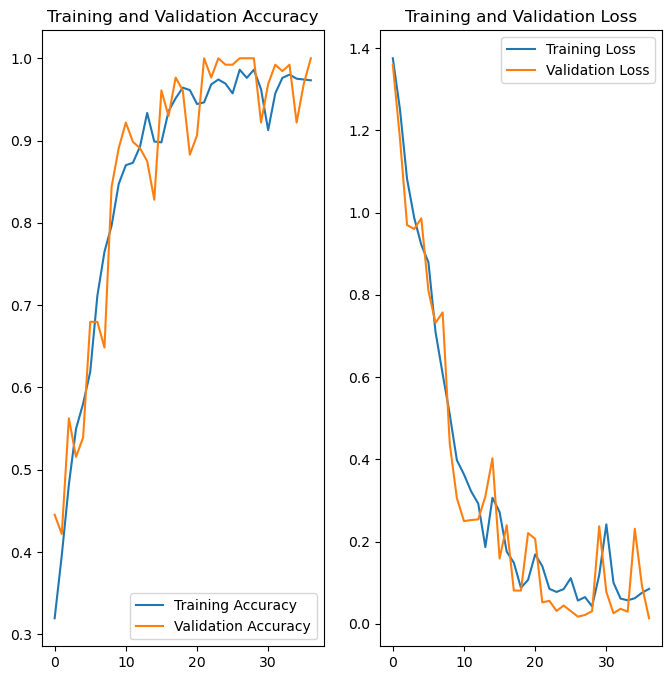

In [45]:
import matplotlib.pyplot as plt

# Assuming acc, val_acc, loss, and val_loss are your data lists or arrays
# If the length of your data is 50, you can either adjust the range to 50 or truncate to the first 37 elements.
# In this example, I will truncate to the first 37 elements.

# Truncate data to the first 37 elements (if necessary)
acc = acc[:37]
val_acc = val_acc[:37]
loss = loss[:37]
val_loss = val_loss[:37]

# Plotting
plt.figure(figsize=(8, 8))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(37), acc, label='Training Accuracy')
plt.plot(range(37), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(range(37), loss, label='Training Loss')
plt.plot(range(37), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plots
plt.show()


first image to predict
actual label: phoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
predicted label: phoma


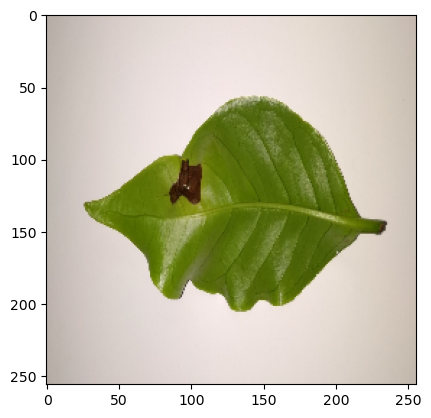

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


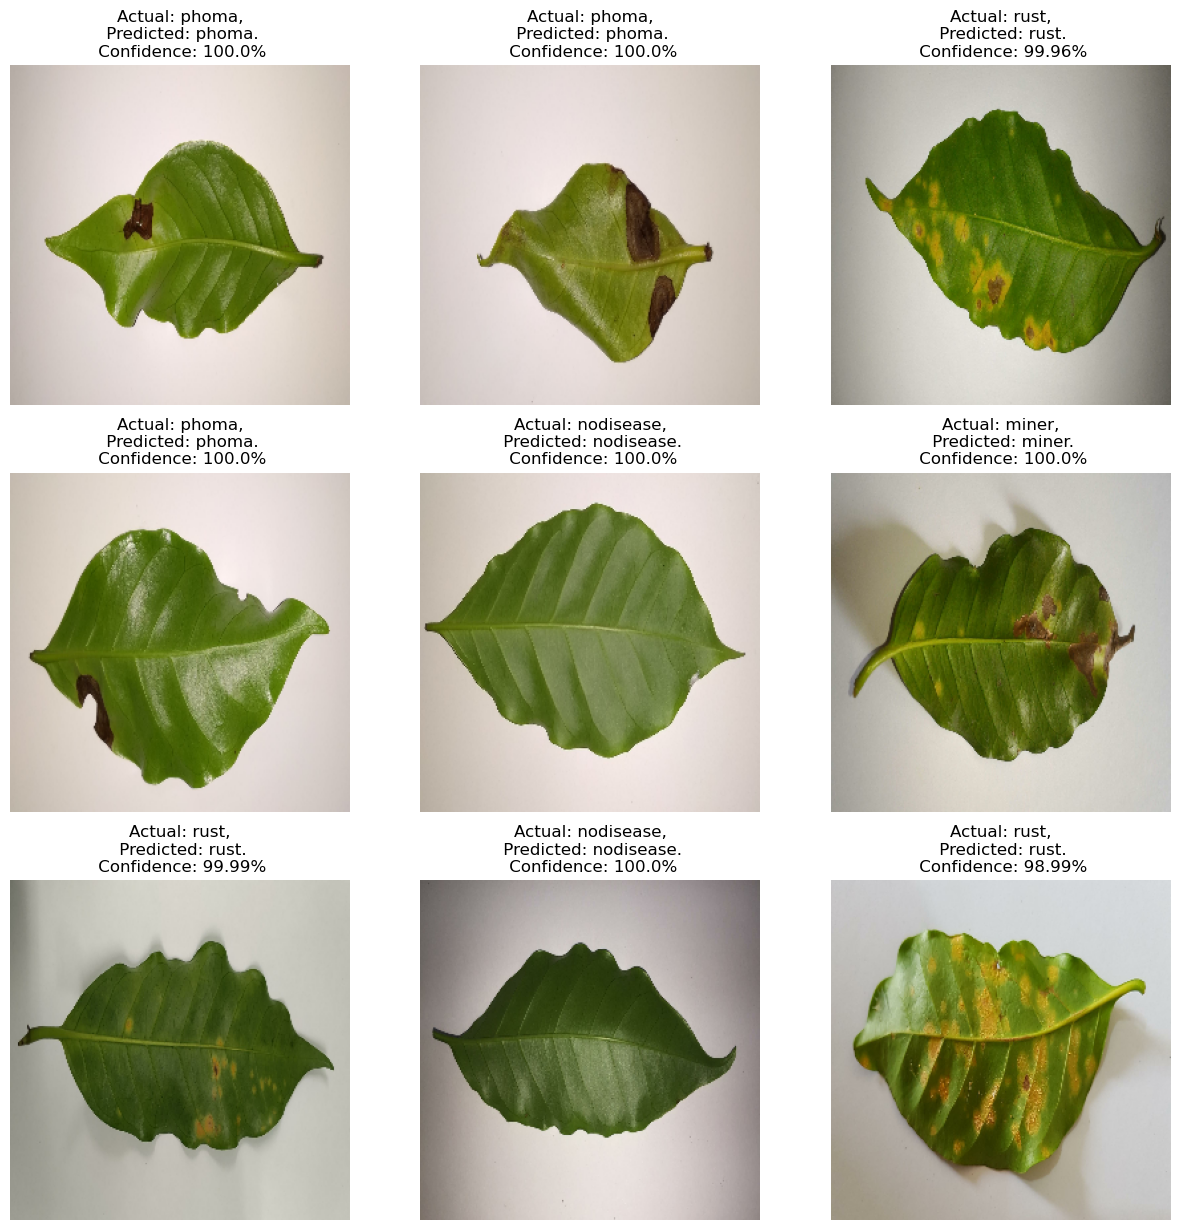

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [49]:
model_version = 20
model.save("server/models/coffee.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


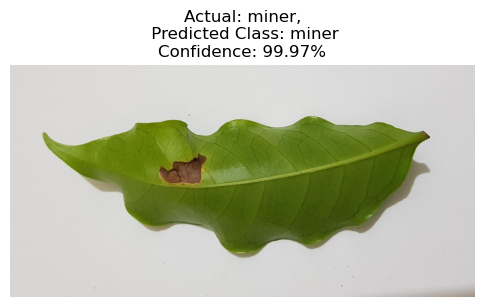

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


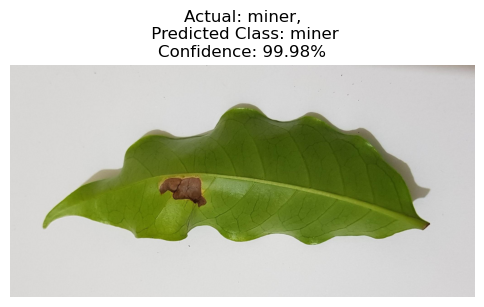

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


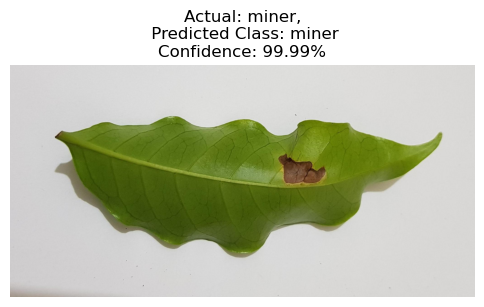

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


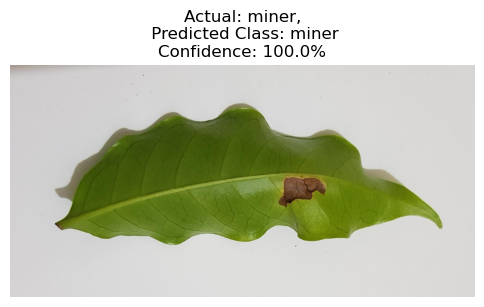

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


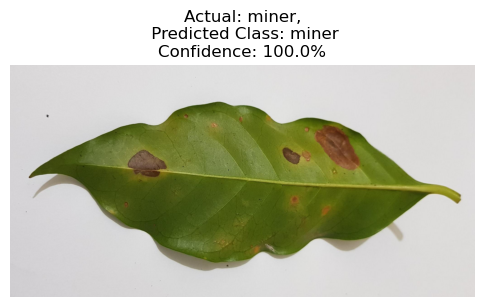

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


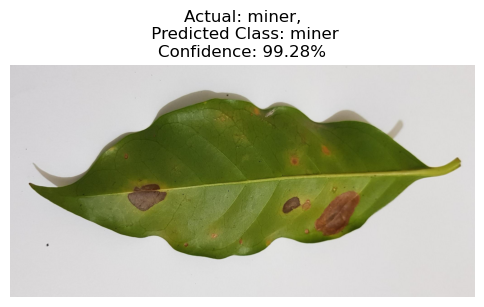

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


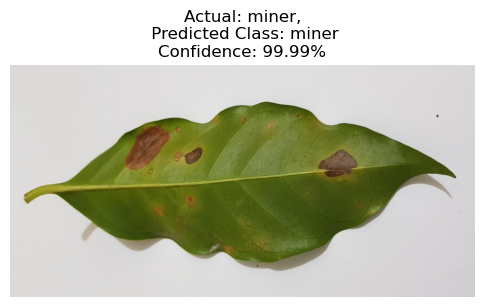

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


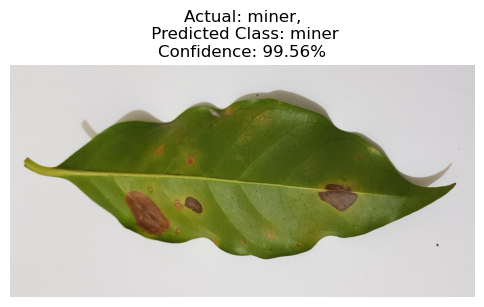

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


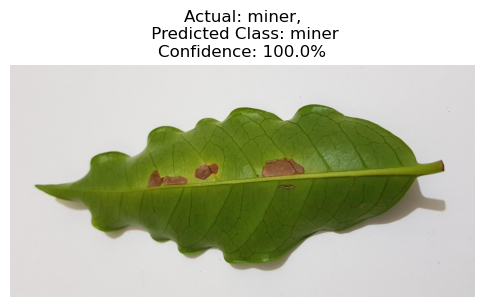

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


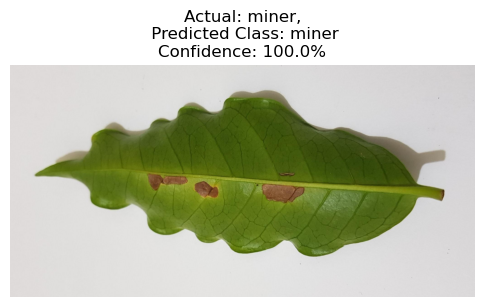

In [54]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict(model, img_path, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


model = tf.keras.models.load_model(r"E:/projects/crop disease detection/server/models/coffee.h5")


class_names = ['miner', 'nodisease', 'phoma', 'rust']


miner =r"E:/projects/crop disease detection/server/datsets/archive (1)/test/miner"
nodisease= r"E:/projects/crop disease detection/server/datsets/archive (1)/test/nodisease"
phoma=r"E:/projects/crop disease detection/server/datsets/archive (1)/test/phoma"
rust=r"E:/projects/crop disease detection/server/datsets/archive (1)/test/rust"
max_iterations=10
def classificator(image_dirteste,actual_class,max_iterations):
    
    iteration_count = 0  
    image_dirteste = image_dirteste
    for filename in os.listdir(image_dirteste):
           
            if filename.endswith('.jpg'):
      
                image_path = os.path.join(image_dirteste, filename)

     
                predicted_class, confidence = predict(model, image_path, class_names)
                Actual: {actual_class}

                plt.figure(figsize=(6, 6))
                img = plt.imread(image_path)
                plt.imshow(img)
                plt.title(f"Actual: {actual_class},\n Predicted Class: {predicted_class}\nConfidence: {confidence}%")
                plt.axis('off')
                plt.show()
            
                iteration_count += 1
                
                
            if iteration_count >= max_iterations:
                break

                
classificator(miner,'miner',10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


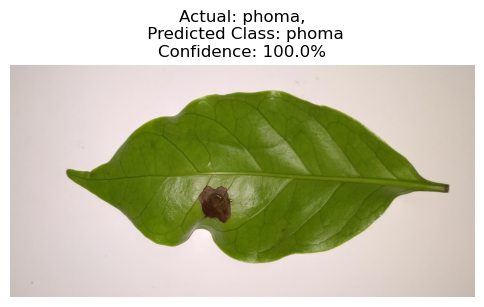

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


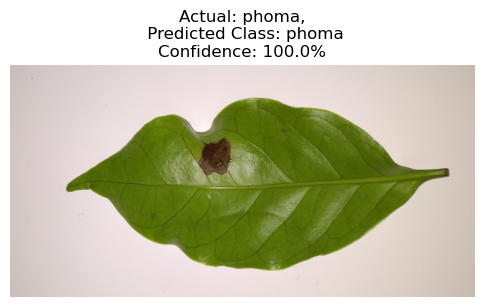

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


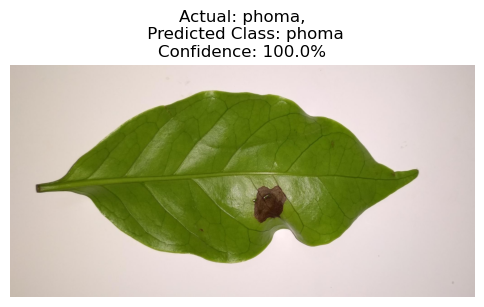

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


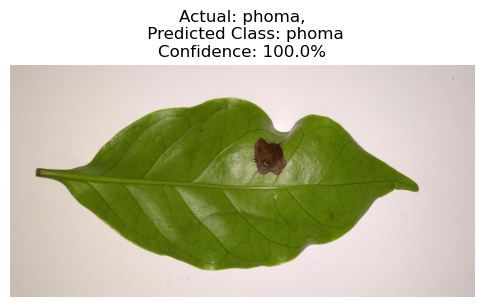

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


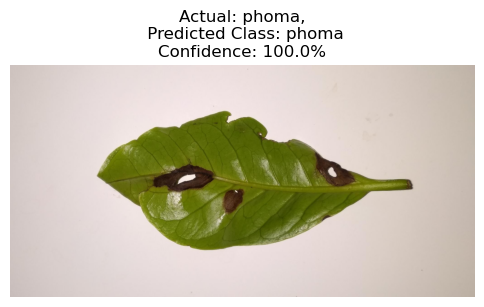

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


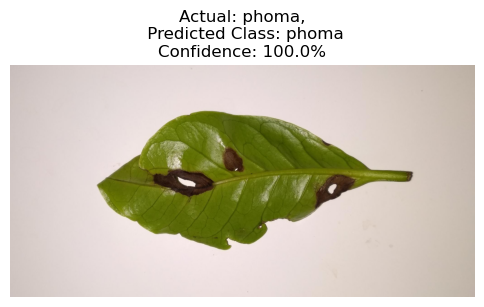

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


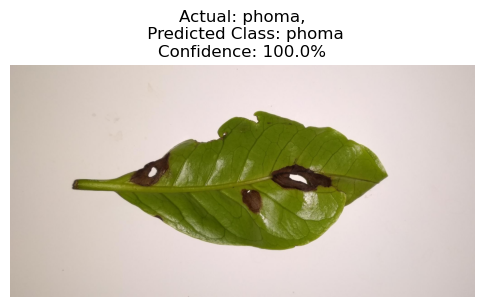

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


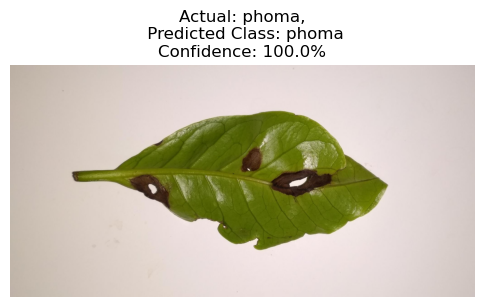

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


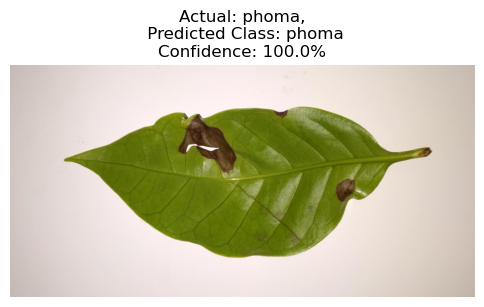

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


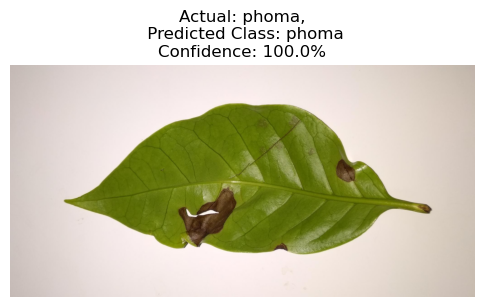

In [55]:
classificator(phoma,'phoma',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


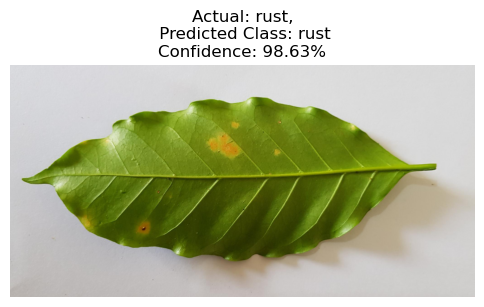

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


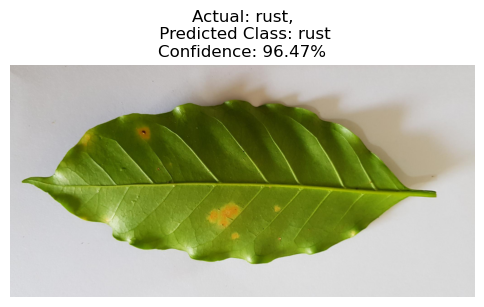

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


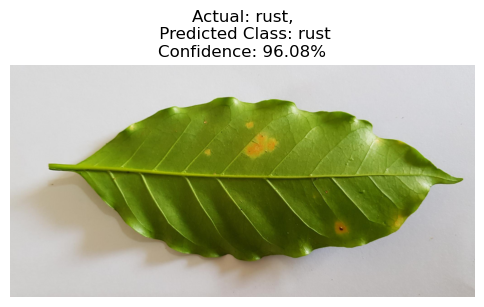

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


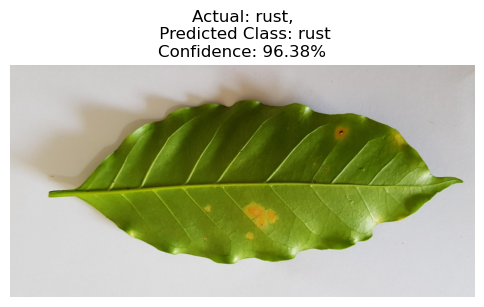

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


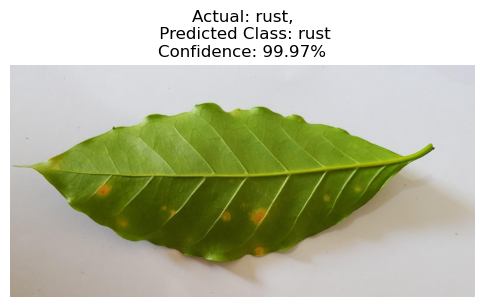

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


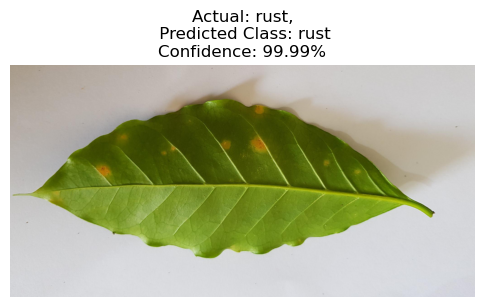

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


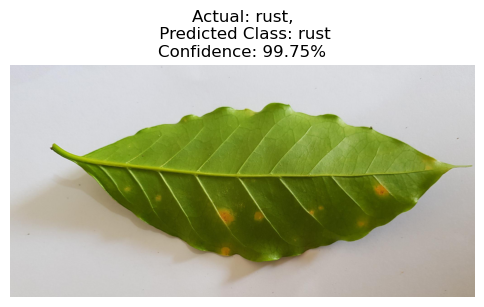

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


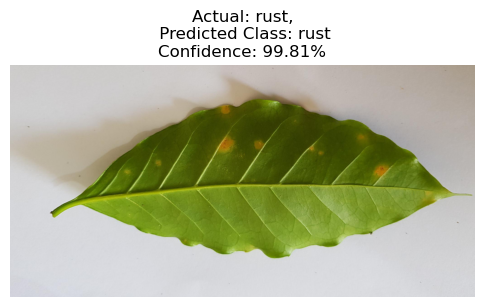

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


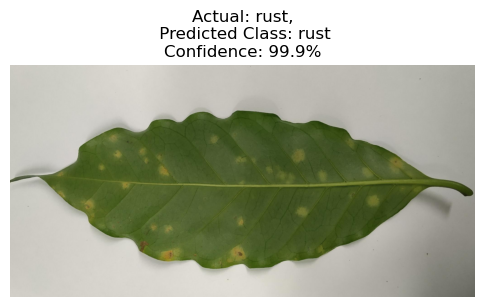

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


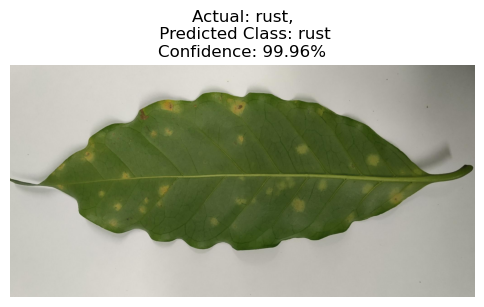

In [56]:
classificator(rust,'rust',10)


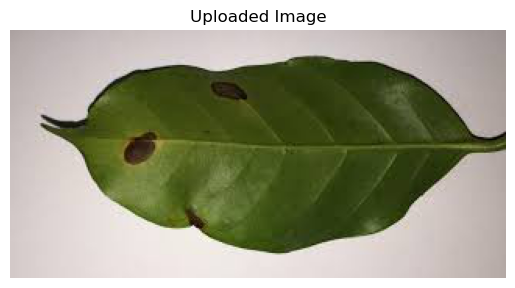

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted Class: phoma
Confidence: 100.0%


In [62]:
import requests
import tensorflow as tf
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model(r"E:/projects/crop disease detection/server/models/coffee.h5")

# Define the class names
class_names = ['miner', 'nodisease', 'phoma', 'rust']

# Function to fetch, preprocess, and predict the image from a URL
def fetch_and_predict_image(url, model, class_names):
    try:
        # Fetch the image from the URL
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for invalid responses

        # Check if the content is an image
        content_type = response.headers['Content-Type']
        if 'image' not in content_type:
            raise ValueError(f"URL does not point to a valid image. Content-Type: {content_type}")

        # Load the image using PIL
        img = Image.open(BytesIO(response.content))

        # Ensure the image is in RGB mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Display the fetched image
        plt.imshow(img)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        # Preprocess the image for the model
        img = img.resize((256, 256))  # Resize to the model's input size
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Normalize pixel values
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * np.max(predictions[0]), 2)

        return predicted_class, confidence

    except requests.exceptions.RequestException as e:
        print(f"Network error: {e}")
    except ValueError as ve:
        print(f"Value error: {ve}")
    except Exception as e:
        print(f"Error processing the image: {e}")

    return None, None

# Main function for testing the code
def main():
    # URL of an image from the internet (replace with a valid URL for testing)
    image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAkIBz27U0YFZxMoTo917lK14ueJmqs1hwzg&s"

    # Get the prediction
    predicted_class, confidence = fetch_and_predict_image(image_url, model, class_names)

    if predicted_class and confidence:
        print(f"Predicted Class: {predicted_class}")
        print(f"Confidence: {confidence}%")
    else:
        print("Prediction failed. Check the image URL or network connection.")

if __name__ == "__main__":
    main()